<a href="https://colab.research.google.com/github/SaionaraAraujo/Curso-DS-Sigmoidal/blob/master/Projeto_Estudo_de_Caso_da_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Em novembro 2019, na cidade de Wuhan, na China, surge o primeiro caso da nova, e portanto, desconhceida doença popularmente conhecida como COVD19. Rapidamente a doença, que era transmissível por gotículas de saliva no ar (dentre vários outros meios), já era considerada endemia e logo em seguida, em março de 2020, já estávamos em uma pandemia. A doença trouxes prejuízos, privações, pânico e muita evolução da ciência.

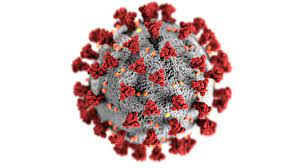

Vamos acompanhar neste trabalho, uma análise dos dados disponibilizados sobr o Brasil.

#Preparação do ambiente e obtenção dos dados

A seguir, vamos deixar as importações ou instalação das bibliotecas necessárias, bem como a obtenção dos dados que analisaremos. Nesta fase do projeto, vamos buscar os dados em um repositório online. Várias são as formas que podemos obter dados, mas para este caso, vamos usar este método. 
O link de acesso ficará registrado na seção de links úteis.

## Preparação do Ambiente

In [ ]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

##Obtenção dos dados

In [ ]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

Agora já temos o dataset no nosso projeto, vamos ver quais as concluões poderemos tirar a partir destes dados. Vamos explorar melhor, buscar vizualizações eficientes para nos mostrar as informações importantes, identificar o que de mais relevante o conjunto nos trouxer.

#Dicionário de Variáveis

Vamos conhecer as variáveis deste conjunto. 



* `iso_code` - Código definido pela norma ISO 3616 para identificar os países
* `continent` - Continente onde o país está localizado
* `location` - País
* `date` - Data do registro
* `total_cases` - Total de casos confirmados, podendo incluir os casos prováveis
* `new_cases`- Novos casos, as contagens podem incluir casos prováveis, quando relatados. Em casos raros em que nossa fonte relata uma mudança diária negativa devido a uma correção de dados, definimos essa métrica como NA.
* `new_cases_smoothed`- Novos casos confirmados de COVID-19 (suavizado de 7 dias). As contagens podem incluir casos prováveis, quando relatados
* `total_deaths` - Mortes atribuídas aos casos de COVID19 
* `new_deaths` - Novas mortes atribuídas ao COVID-19. As contagens podem incluir mortes prováveis, quando relatadas. Em casos raros em que nossa fonte relata uma mudança diária negativa devido a uma correção de dados, definimos essa métrica como NA
* `new_deaths_smoothed` - Novas mortes atribuídas ao COVID-19 (suavizado de 7 dias)
* total_cases_per_million - Total de casos confirmados de COVID-19 por 1.000.000 de pessoa
* `new_cases_per_million` - Novos casos confirmados de COVID-19 por 1.000.000 de pessoa
* `new_cases_smoothed_per_million`- Novos casos confirmados de COVID-19 (suavizado em 7 dias) por 1.000.000 de pessoas
* `total_deaths_per_million` -  Total de mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
* `new_deaths_per_million` - Novas mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
* `new_deaths_smoothed_per_million` - Novas mortes atribuídas ao COVID-19 (suavizado em 7 dias) por 1.000.000 de pessoas
* `reproduction_rate` - Estimativa em tempo real da taxa efetiva de reprodução (R) do COVID-19.
* `icu_patients`- Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia
* `icu_patients_per_million` - Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia  por 1.000.000 pessoas
* `hosp_patients`- Número de pacientes com COVID-19 no hospital em um determinado dia
* `hosp_patients_per_million` Número de pacientes com COVID-19 no hospital em um determinado dia por 1.000.000 pessoas
* `weekly_icu_admissions`- Número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana (data de notificação e 6 dias anteriores)
*  `weekly_icu_admissions_per_million` - Número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana (data de notificação e 6 dias anteriores) por 1.000.000 pessoas
* `weekly_hosp_admissions` - Número de pacientes com COVID-19 recém-admitidos em hospitais em uma determinada semana (data do relatório e 6 dias anteriores)
* `weekly_hosp_admissions_per_million` - Número de pacientes com COVID-19 recém-admitidos em hospitais em uma determinada semana (data do relatório e 6 dias anteriores) por 1.000.000 pessoas
* `total_tests`  - Total de testes para COVID-19
* `new_tests` - Novos testes para COVID-19 (calculado apenas para dias consecutivos)
* `total_tests_per_thousand` - Total de testes para COVID-19 por 1.000 pessoas
* `new_tests_per_thousand` - Novos testes para COVID-19 por 1.000 pessoas
* `new_tests_smoothed`- Novos testes para COVID-19 (suavizado de 7 dias). Para países que não relatam dados de teste diariamente, assumimos que os testes mudaram igualmente diariamente em todos os períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são então calculados em uma janela contínua de 7 dias
* `new_tests_smoothed_per_thousand ` - Novos testes para COVID-19 (suavizado de 7 dias) por 1.000. Para países que não relatam dados de teste diariamente, assumimos que os testes mudaram igualmente diariamente em todos os períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são então calculados em uma janela contínua de 7 dias
* `positive_rate` - A parcela de testes COVID-19 positivos, dada como uma média contínua de 7 dias (este é o inverso de tests_per_case)
* `tests_per_case` - Testes realizados por novo caso confirmado de COVID-19, dados como uma média contínua de 7 dias (este é o inverso de `positive_rate`)
* `tests_units` - Unidades usadas pelo local para relatar seus dados de teste. Um arquivo de país não pode conter unidades mistas. Todas as métricas relativas aos dados de teste usam a unidade de teste especificada. As unidades válidas são 'pessoas testadas' (número de pessoas testadas), 'testes realizados' (número de testes realizados. uma única pessoa pode ser testada mais de uma vez em um determinado dia) e 'amostras testadas' (número de amostras testadas. Em alguns casos, mais de uma amostra pode ser necessária para realizar um determinado teste.)
* `total_vaccinations` - Número total de doses de vacinação COVID-19 administradas
* `people_vaccinated` - Número total de pessoas que receberam pelo menos uma dose de vacina
* `people_fully_vaccinated` - Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação inicial
* `total_boosters` - Número total de doses de reforço de vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação)
* `new_vaccinations` - Novas doses de vacinação COVID-19 administradas (calculadas apenas para dias consecutivos)
* `new_vaccinations_smoothed` - Novas doses de vacinação COVID-19 administradas (suavizado por 7 dias). Para países que não relatam dados de vacinação diariamente, assumimos que a vacinação mudou igualmente diariamente em todos os períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são então calculados em uma janela contínua de 7 dias
* `total_vaccinations_per_hundred` - Número total de doses de vacinação COVID-19 administradas por 100 pessoas na população total
* `people_vaccinated_per_hundred` - Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas na população total
* `people_fully_vaccinated_per_hundred` - Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação inicial por 100 pessoas na população total
* `total_boosters_per_hundred` - Número total de doses de reforço de vacinação COVID-19 administradas por 100 pessoas na população total
* `new_vaccinations_smoothed_per_million` - Novas doses de vacinação COVID-19 administradas (suavizadas em 7 dias) por 1.000.000 de pessoas na população total
* `new_people_vaccinated_smoothed` - Daily number of people receiving their first vaccine dose (7-day smoothed)
* `new_people_vaccinated_smoothed_per_hundred` - Número diário de pessoas que recebem sua primeira dose de vacina (suavizado de 7 dias) por 100 pessoas na população total
* `stringency_index` - Índice de Rigidez de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibição de viagens, reescalonado para um valor de 0 a 100 (100 = resposta mais rigorosa)
* `population` - População (últimos valores disponíveis)
* `population_density` - Número de pessoas dividido por área de terra, medido em quilômetros quadrados, ano mais recente disponível
* `median_age` - Idade média da população, projeção da ONU para 2020
* `aged_65_older` - Parcela da população com 65 anos ou mais, ano mais recente disponível
* `aged_70_older` - Parcela da população com 70 anos ou mais em 2015
* `gdp_per_capita` - Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível
* `extreme_poverty` - Percentual da população que vive em extrema pobreza, ano mais recente disponível desde 2010
* `cardiovasc_death_rate` - Taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100.000 pessoas) 
* `diabetes_prevalence` - Prevalência de diabetes (% da população de 20 a 79 anos) em 2017
* `female_smokers` - Proporção de mulheres que fumam, ano mais recente disponível
* `male_smokers` - Proporção de homens que fumam, ano mais recente disponível
* `handwashing_facilities` - Percentagem da população com instalações básicas de lavagem das mãos nas instalações, ano mais recente disponível
* `hospital_beds_per_thousand` - Camas hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010
* `life_expectancy` - Expectativa de vida ao nascer em 2019
* `human_development_index` - Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano – uma vida longa e saudável, conhecimento e um padrão de vida decente. Valores para 2019, importados de http://hdr.undp.org/en/indicators/137506
* `excess_mortality_cumulative_absolute` - Diferença cumulativa entre o número relatado de óbitos desde 1º de janeiro de 2020 e o número projetado de óbitos para o mesmo período com base em anos anteriores. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality
* `excess_mortality_cumulative` - Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período com base em anos anteriores, por milhão de pessoas. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality
* `excess_mortality` - Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020-2021 e o número projetado de mortes para o mesmo período com base em anos anteriores. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality
* `excess_mortality_cumulative_per_million` - Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020-2021 e o número projetado de mortes para o mesmo período com base em anos anteriores. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality



#Conhecendo o dataset

Vamos ver como são as primeiras e últimas entradas do conjunto de dados:

In [ ]:
#Imprimir as 5 primeiras linhas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
#Imprimir as 5  ultimas linhas
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
217735,ZWE,Africa,Zimbabwe,2022-09-15,256939.0,0.0,15.000,5596.0,0.0,0.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
217736,ZWE,Africa,Zimbabwe,2022-09-16,256939.0,0.0,11.429,5596.0,0.0,0.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
217737,ZWE,Africa,Zimbabwe,2022-09-17,256988.0,49.0,16.857,5598.0,2.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
217738,ZWE,Africa,Zimbabwe,2022-09-18,256996.0,8.0,18.000,5598.0,0.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
217739,ZWE,Africa,Zimbabwe,2022-09-19,257090.0,94.0,28.857,5598.0,0.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


###Tipos de dados

A seguir, conheceremos os tipos de dados que formam o nosso dataset

In [ ]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

É interessante observar se os tipos de dados são adequados para as análises que você deseja realizar. A exemplo, vamos observar especificamente a data. Neste dataset, a data está no formato Object, que é um tipo de dado bastante genérico e que não nos permite, por exemplo, verificar o comportamento dos dados ao longo dos anos. Vamos então transformar este dado para o melhor tipo.

In [ ]:
#Transformar o date em datetime
df.date = pd.to_datetime(df.date)

Vamos verificar o tipo atual?

In [ ]:
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

Agora já podemos fazer análises temporais com o atributo `date`. Por exemplo, vamos ver os países com mais mortes, nas datas mais recentes.

####Data mais recente

In [ ]:
df.date.sort_values(ascending=False)

217739   2022-09-19
95114    2022-09-19
180982   2022-09-19
175084   2022-09-19
72213    2022-09-19
            ...    
7440     2020-01-03
7439     2020-01-02
125842   2020-01-02
125841   2020-01-01
7438     2020-01-01
Name: date, Length: 217740, dtype: datetime64[ns]

O comando acima vai nos trazer as datas ordenandas da mais recente para a mais antiga, logo, a primeira é a mais atual. Agora vamos, neste mesmo comando, mas identificando a data encontrada anteriormente, ordenar os registros do dia pelo número de casos.

In [ ]:
df.loc[df.date == '2022-09-19'].sort_values(by = "total_cases" , ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
215016,OWID_WRL,NaN,World,2022-09-19,612314658.0,439815.0,474657.571,6527372.0,1422.0,1651.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
85685,OWID_HIC,NaN,High income,2022-09-19,377044413.0,343232.0,377966.857,2658735.0,919.0,1235.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63756,OWID_EUR,NaN,Europe,2022-09-19,226614640.0,203281.0,187189.714,1935607.0,418.0,571.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11283,OWID_ASI,NaN,Asia,2022-09-19,183728534.0,144162.0,200717.857,1481188.0,282.0,388.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64727,OWID_EUN,NaN,European Union,2022-09-19,165974944.0,150962.0,120102.143,1144430.0,309.0,421.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92297,OWID_INT,NaN,International,2022-09-19,721.0,0.0,0.000,15.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211451,VAT,Europe,Vatican,2022-09-19,29.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN
201469,TUV,Oceania,Tuvalu,2022-09-19,20.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.57,NaN,NaN,NaN,NaN,NaN
164309,SHN,Africa,Saint Helena,2022-09-19,7.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN


Agora vamos fazer o mesmo, mas organizando por números de mortos:

In [ ]:
df.loc[df.date == '2022-09-19'].sort_values(by = "total_deaths" , ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
215016,OWID_WRL,NaN,World,2022-09-19,612314658.0,439815.0,474657.571,6527372.0,1422.0,1651.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
85685,OWID_HIC,NaN,High income,2022-09-19,377044413.0,343232.0,377966.857,2658735.0,919.0,1235.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208004,OWID_UMC,NaN,Upper middle income,2022-09-19,137140241.0,82458.0,76721.429,2487943.0,377.0,291.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63756,OWID_EUR,NaN,Europe,2022-09-19,226614640.0,203281.0,187189.714,1935607.0,418.0,571.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144181,OWID_NAM,NaN,North America,2022-09-19,113509092.0,57528.0,67507.429,1506547.0,438.0,518.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167036,SPM,North America,Saint Pierre and Miquelon,2022-09-19,3166.0,0.0,5.000,1.0,0.0,0.000,...,NaN,NaN,NaN,NaN,81.07,NaN,NaN,NaN,NaN,NaN
66556,FLK,South America,Falkland Islands,2022-09-19,1886.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.44,NaN,NaN,NaN,NaN,NaN
164309,SHN,Africa,Saint Helena,2022-09-19,7.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN
201469,TUV,Oceania,Tuvalu,2022-09-19,20.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.57,NaN,NaN,NaN,NaN,NaN


Agora vamos plotar um gráfico de barras com os 5 países com mais casos registrados e de morte, para analisar visualmente se há alguma diferença nos com mais registros.

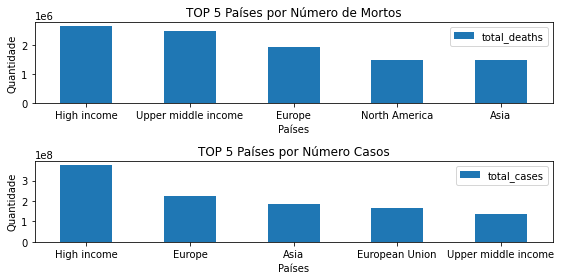

In [ ]:
#Selecionando os eixos dos gráficos: 'location', o País, e 'total_deaths' ou 'total_cases', que trazem a quantidade para definir o tamanho das barras.
top5_total_deaths = df.loc[df.date == '2022-09-19', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]
top5_total_cases = df.loc[df.date == '2022-09-19', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:6]

#Criando objetos para plotar os gráficos
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1, figsize = (8,4))

#Definindo os gráficos
top5_total_deaths.plot(x='location', y='total_deaths', kind = "bar", ax=ax, rot = 0 )
top5_total_cases.plot(x='location', y='total_cases', kind = "bar", ax=ax1, rot = 0)

#Definindo os títulos dos gráficos e dos eixos
ax.set_title("TOP 5 Países por Número de Mortos")
ax.set_xlabel("Países")
ax.set_ylabel("Quantidade")

ax1.set_title("TOP 5 Países por Número Casos")
ax1.set_xlabel("Países")
ax1.set_ylabel("Quantidade")

plt.tight_layout()

Com os dados selecionados acima, organizados por maior quantidade, seja de mortes ou casos registrados, podemos ver que em relação ao número de mortos, na data selecionada, a América do Norte aparece em 4º lugar. Contudo, este país não aparece no ranking de quantidade de casos, onde surge a União Européia. Assim como podemos perceber também a alteração de posição das colunas `Upper Middle Income`e `Europa`. Podemos ver que, com base nestes estes parâmetros, há uma leve alteração entre a quantidade de mortes e de casos rregistrados.

Como já vimos no dicionário de dados, temos muitas colunas neste dataset. Vamos ver todas elas com o comando a seguir:

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

É importante sabermos também, o tamanho do nosso conjunto de dados para saber dimensionar nossos esforços. O seguinte comando nos trará a quantidade de linhas e de colunas:

In [ ]:
#quantidade de linhas e colunas:
print("Linhas:",df.shape[0])
print("Colunas:",df.shape[1])

Linhas: 217740
Colunas: 67


Agora sabemos que temos **217.278** linhas e **67** colunas.

Vamos verificar agora qual o percentual de dados ausentes para as colunas que temos:

In [ ]:
print("Quantidade (em %) de dados faltantes para cada coluna: ")
#Soma a quantidade de campos vazios, dividindo pelo total de linhas e ordenando do maior (o que tem maior número de linhas vazias) para o menor
((df.isnull().sum()/df.shape[0]).sort_values(ascending = False))*100

Quantidade (em %) de dados faltantes para cada coluna: 


weekly_icu_admissions_per_million          96.713512
weekly_icu_admissions                      96.713512
excess_mortality_cumulative_per_million    96.660696
excess_mortality_cumulative                96.660696
excess_mortality_cumulative_absolute       96.660696
                                             ...    
total_cases                                 4.089281
population                                  0.584642
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64

Podemos percever que há colunas com mais de 96% de dados ausentes, o que pode influenciar bastante no tamanho da nossa base, e não trazer nenhuma informação relevante. Veremos adiante como tratar estes dados.

##Valores Ausentes

Agora vamos analisar e tratar os valores ausentes do conjunto de dados. Inicialmente, precisamos quantificar, e para isso, vamos usar o comando `isnull()`

In [ ]:
df.isnull().sum()

iso_code                                        0
continent                                   12530
location                                        0
date                                            0
total_cases                                  8904
                                            ...  
human_development_index                     43725
excess_mortality_cumulative_absolute       210469
excess_mortality_cumulative                210469
excess_mortality                           210424
excess_mortality_cumulative_per_million    210469
Length: 67, dtype: int64

#Links Úteis

Todos os links utilizados no desenvolvimento deste trabalho estam disponibilizados a seguir:



*  Dados: https://github.com/owid/covid-19-data/tree/master/public/data
*   Item da lista

